In [29]:
import pandas as pd

# Load dataset
data = pd.read_excel('dataset_mesinterbaru.xlsx')
print("Data loaded. Shape:", data.shape)


Data loaded. Shape: (175, 8)


In [30]:
# Memisahkan fitur dan label
X = data.drop(columns='Label', axis=1)
y = data['Label']

print("Fitur:", X.columns.tolist())
print("Jumlah data:", len(y))
print("Distribusi kelas:\n", y.value_counts())


Fitur: ['Fan_and_ Motor', 'Frekuensi_Fan_1', 'Frekuensi_Fan_2', 'Pressure_Gauge', 'Pipe_and_Strainer', 'Inlet', 'Outlet']
Jumlah data: 175
Distribusi kelas:
 Label
1    90
0    85
Name: count, dtype: int64


In [31]:
# Cek missing value
print("Missing value per kolom:\n", X.isnull().sum())

# Jika ada missing, bisa diisi atau dihapus
# Contoh:
# X.fillna(X.mean(), inplace=True)
# atau
# data.dropna(inplace=True)


Missing value per kolom:
 Fan_and_ Motor       0
Frekuensi_Fan_1      0
Frekuensi_Fan_2      0
Pressure_Gauge       0
Pipe_and_Strainer    0
Inlet                0
Outlet               0
dtype: int64


In [32]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling imbalance dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Data setelah SMOTE:", X_resampled.shape, y_resampled.value_counts())


Data setelah SMOTE: (180, 7) Label
1    90
0    90
Name: count, dtype: int64


In [33]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(200, 150, 100),
    alpha=0.001,
    learning_rate_init=0.005,
    activation='relu',
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=42,
    verbose=True
)
model.fit(X_scaled, y)


Iteration 1, loss = 0.71564378
Validation score: 0.611111
Iteration 2, loss = 0.60194497
Validation score: 0.500000
Iteration 3, loss = 0.54798985
Validation score: 0.833333
Iteration 4, loss = 0.48927671
Validation score: 0.944444
Iteration 5, loss = 0.43055537
Validation score: 0.944444
Iteration 6, loss = 0.38228961
Validation score: 0.944444
Iteration 7, loss = 0.33208742
Validation score: 0.944444
Iteration 8, loss = 0.28315963
Validation score: 0.944444
Iteration 9, loss = 0.23399766
Validation score: 1.000000
Iteration 10, loss = 0.19122553
Validation score: 1.000000
Iteration 11, loss = 0.15599087
Validation score: 1.000000
Iteration 12, loss = 0.12632875
Validation score: 1.000000
Iteration 13, loss = 0.10079609
Validation score: 1.000000
Iteration 14, loss = 0.08341391
Validation score: 1.000000
Iteration 15, loss = 0.06977385
Validation score: 1.000000
Iteration 16, loss = 0.05769230
Validation score: 1.000000
Iteration 17, loss = 0.04766485
Validation score: 1.000000
Iterat

MLPClassifier(alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(200, 150, 100), learning_rate_init=0.005,
              max_iter=500, n_iter_no_change=20, random_state=42, verbose=True)

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
f1_scores = []

for train_idx, test_idx in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train_idx], X_resampled[test_idx]
    y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)

print(f"Mean F1 Score (10-fold CV): {np.mean(f1_scores):.4f}")
print(f"Std F1 Score (10-fold CV): {np.std(f1_scores):.4f}")


Iteration 1, loss = 0.71231435
Validation score: 0.647059
Iteration 2, loss = 0.59886979
Validation score: 0.647059
Iteration 3, loss = 0.53945101
Validation score: 0.588235
Iteration 4, loss = 0.47573161
Validation score: 0.705882
Iteration 5, loss = 0.41638655
Validation score: 0.705882
Iteration 6, loss = 0.36748402
Validation score: 0.764706
Iteration 7, loss = 0.31647588
Validation score: 0.823529
Iteration 8, loss = 0.26301443
Validation score: 0.823529
Iteration 9, loss = 0.21440692
Validation score: 0.823529
Iteration 10, loss = 0.17067989
Validation score: 0.823529
Iteration 11, loss = 0.13691978
Validation score: 0.823529
Iteration 12, loss = 0.10674765
Validation score: 0.823529
Iteration 13, loss = 0.08533179
Validation score: 0.823529
Iteration 14, loss = 0.06917324
Validation score: 0.882353
Iteration 15, loss = 0.05493441
Validation score: 0.882353
Iteration 16, loss = 0.04491155
Validation score: 0.882353
Iteration 17, loss = 0.03821384
Validation score: 0.882353
Iterat

In [35]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

# Setelah model.fit
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("Train F1:", f1_train)
print("Test F1:", f1_test)


Train F1: 0.9753086419753086
Test F1: 0.9442724458204335


In [36]:
y_pred = model.predict(X_scaled)

print("Akurasi:", accuracy_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y, y_pred))

data['Predicted_Label'] = y_pred
data.to_excel('hasil_prediksi_175_data_ann_terbaru.xlsx', index=False)
print("\n✅ Hasil prediksi disimpan ke: hasil_prediksi_175_data_ann.xlsx")

Akurasi: 0.9714285714285714
F1 Score: 0.9714136365121369

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        85
           1       0.98      0.97      0.97        90

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175


✅ Hasil prediksi disimpan ke: hasil_prediksi_175_data_ann.xlsx


In [37]:
test_data = [
    [1, 40, 40, 2.89, 1, 31.56, 31.63],
    [1, 40, 40, 0.71, 1, 29.70, 29.14],
    [1, 40, 40, 1.60, 1, 28.99, 30.51]
]
true_labels = [1, 1, 0]

# 6. Transformasi & prediksi
test_scaled = scaler.transform(test_data)
predictions = model.predict(test_scaled)

# 7. Evaluasi
print("Hasil Prediksi:", predictions)
print("Label Asli    :", true_labels)
print("\nClassification Report:")
print(classification_report(true_labels, predictions))
print("Macro F1 Score:", f1_score(true_labels, predictions, average='macro'))

Hasil Prediksi: [1 1 0]
Label Asli    : [1, 1, 0]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Macro F1 Score: 1.0


c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


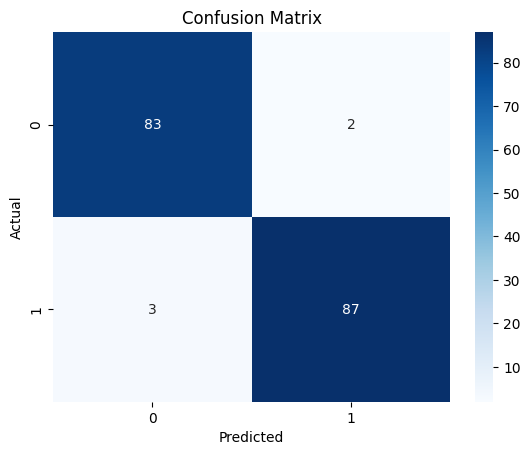

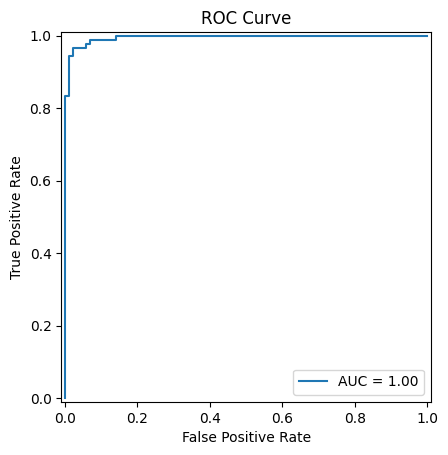

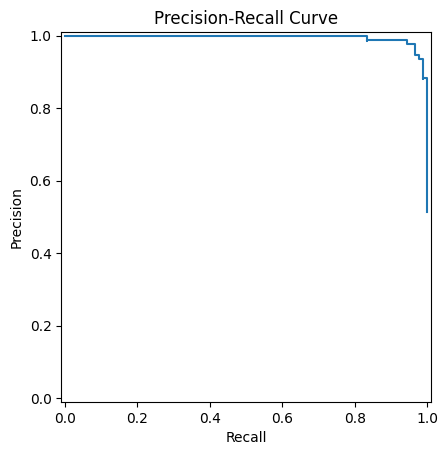

Iteration 1, loss = 0.71420010
Validation score: 1.000000
Iteration 2, loss = 0.58548691
Validation score: 1.000000
Iteration 3, loss = 0.51305349
Validation score: 1.000000
Iteration 4, loss = 0.44489578
Validation score: 1.000000
Iteration 5, loss = 0.38311474
Validation score: 1.000000
Iteration 6, loss = 0.32468124
Validation score: 1.000000
Iteration 7, loss = 0.26268460
Validation score: 1.000000
Iteration 8, loss = 0.20138141
Validation score: 1.000000
Iteration 9, loss = 0.15135330
Validation score: 1.000000
Iteration 10, loss = 0.10784984
Validation score: 1.000000
Iteration 11, loss = 0.07223476
Validation score: 1.000000
Iteration 12, loss = 0.04828280
Validation score: 1.000000
Iteration 13, loss = 0.03207946
Validation score: 1.000000
Iteration 14, loss = 0.02272805
Validation score: 1.000000
Iteration 15, loss = 0.01790784
Validation score: 1.000000
Iteration 16, loss = 0.01517441
Validation score: 1.000000
Iteration 17, loss = 0.01375137
Validation score: 1.000000
Iterat

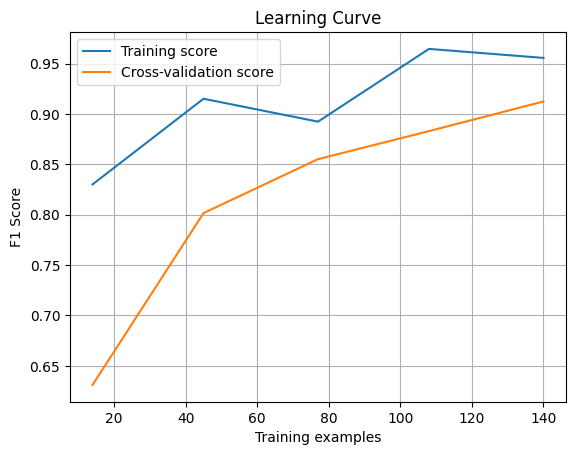

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc,
    precision_recall_curve, RocCurveDisplay,
    PrecisionRecallDisplay
)
from sklearn.model_selection import learning_curve

# 1. Confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve (jika hanya dua kelas)
if len(np.unique(y)) == 2:
    y_scores = model.predict_proba(X_scaled)[:, 1]  # skor probabilitas untuk kelas 1
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)

    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
    plt.title('ROC Curve')
    plt.show()

# 3. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y, y_scores)
    PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title('Precision-Recall Curve')
    plt.show()

# 4. Learning Curve (opsional)
from sklearn.model_selection import ShuffleSplit

train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='f1_macro'
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [39]:
import pickle
filename = 'model_kerusakan_ann_terbaru.sav'
pickle.dump(model, open(filename, 'wb'))
pickle.dump(scaler, open('scaler_ann_terbaru.sav', 'wb'))